<a href="https://colab.research.google.com/github/suucong/AI_Practice/blob/main/AutoIncoderPrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
batch_size = 256
learning_rate = 0.0002;
num_epoch = 5

In [4]:
# 데이터 다운로드
mnist_train = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST(root="../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 130086298.99it/s]

Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41915464.99it/s]


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31210304.60it/s]


Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3922283.05it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



In [5]:
# DataLoader 설정
train_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [6]:
# 모델 선언
# 인공신경망으로 이루어진 오토인코더를 생성
# 단순하게 하기 위해 활성화 함수 생략
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Linear(28*28, 20)
    self.decoder = nn.Linear(20, 28*28)

  def forward(self, x):
    x = x.view(batch_size, -1)
    encoded = self.encoder(x)
    out = self.decoder(encoded).view(batch_size, 1, 28, 28)
    return out

In [14]:
# 손실 함수, 최적화 함수
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()  # 인스턴스를 생성
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda:0


In [15]:
loss_arr = []
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, x)
    loss.backward()
    optimizer.step()

  if j%1000 == 0:
    print(loss)
    loss_arr.append(loss.cpu().data.numpy()[0])

torch.Size([256, 28, 28])


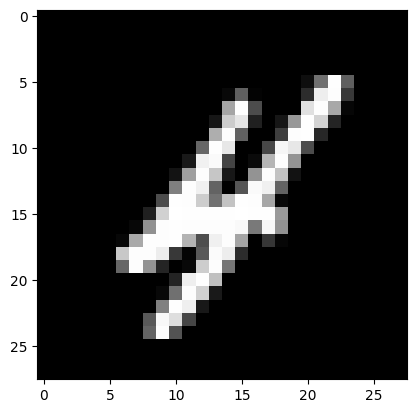

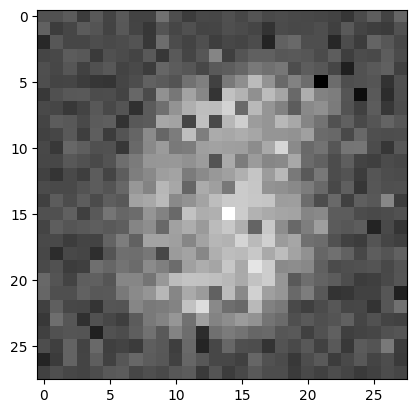

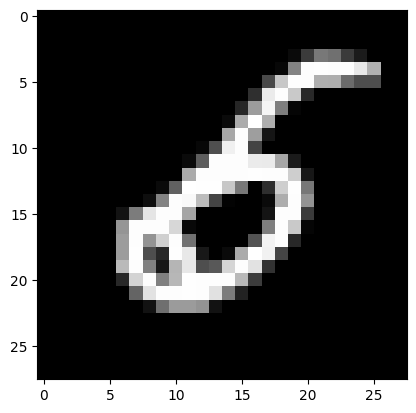

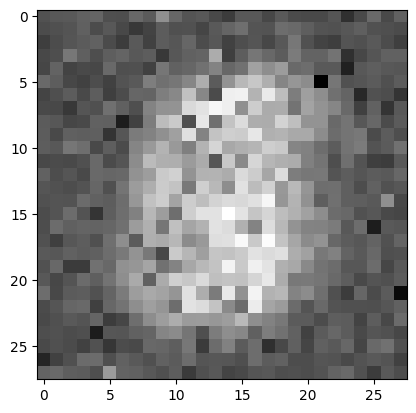

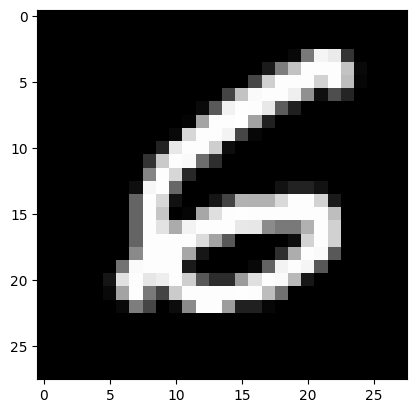

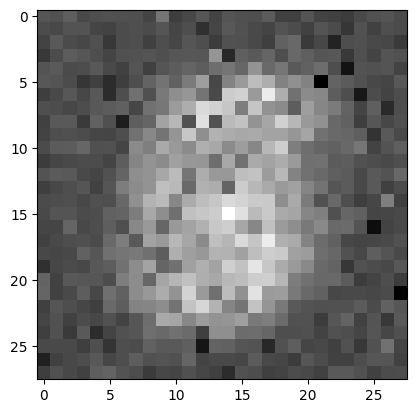

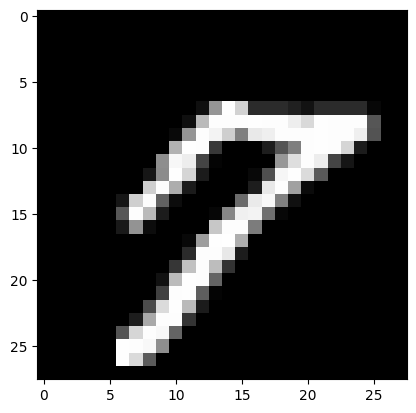

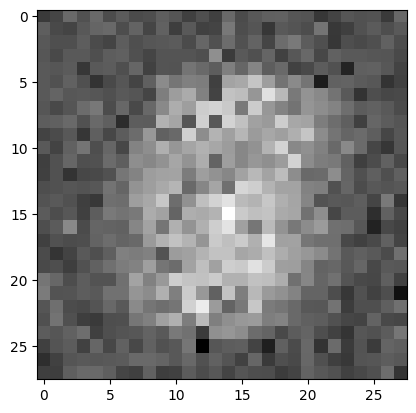

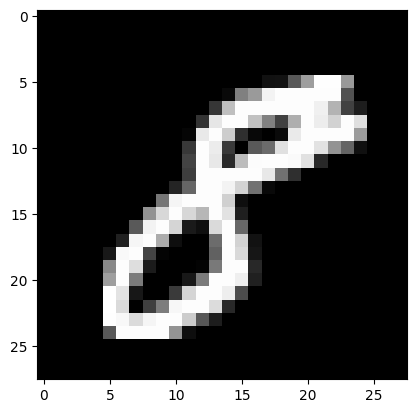

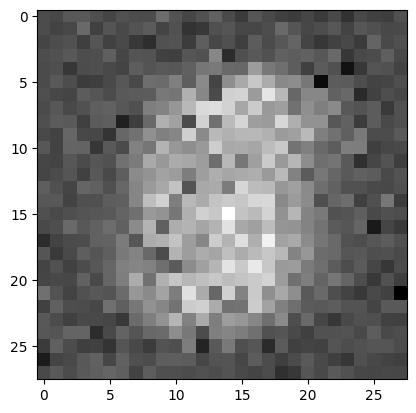

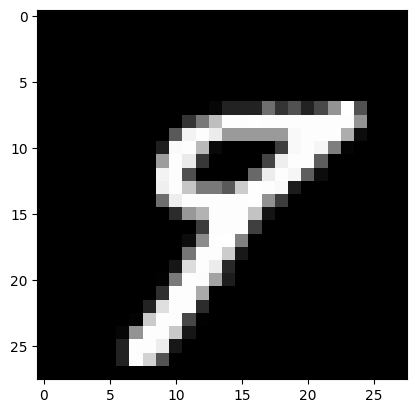

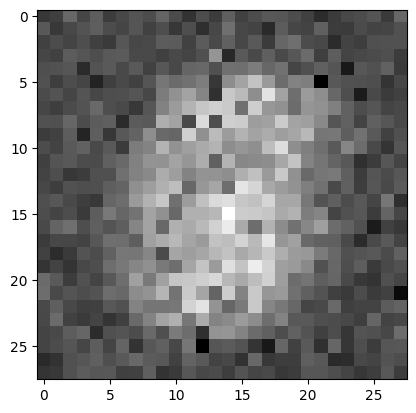

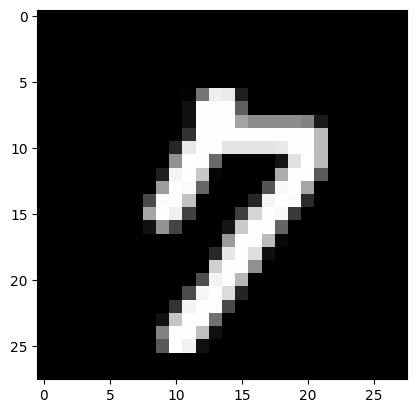

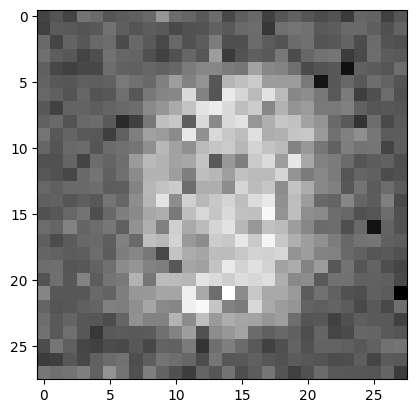

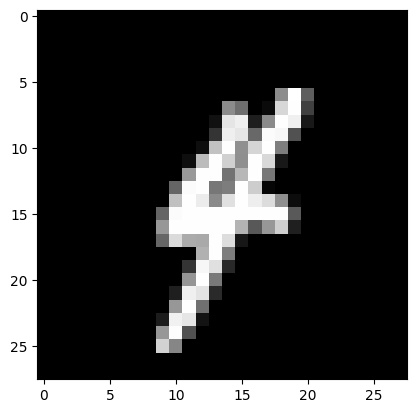

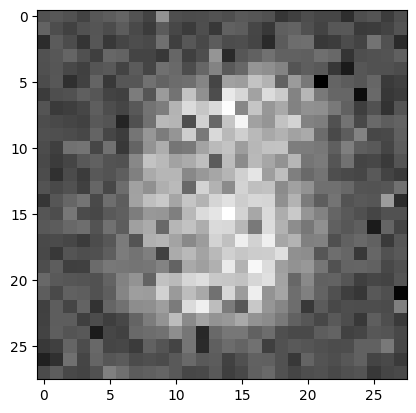

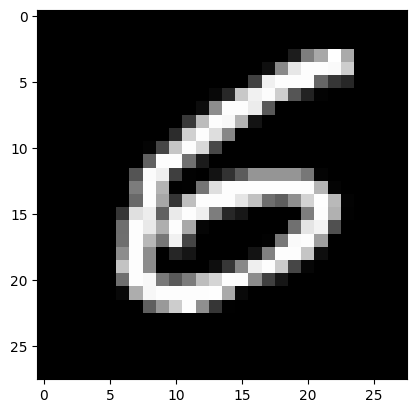

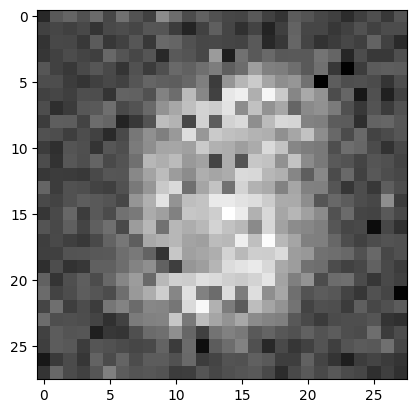

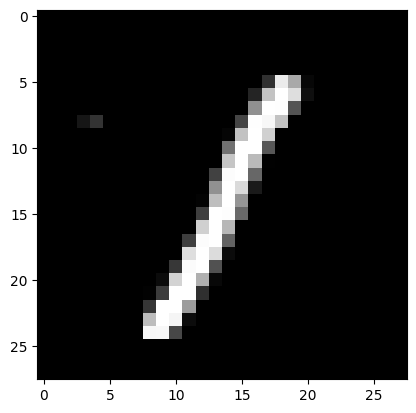

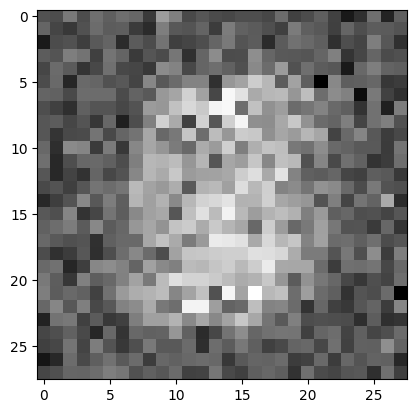

In [17]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
  plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

In [19]:
with torch.no_grad():
  for i in range(1):
    for j,[image, label] in enumerate(test_loader):
      x = image.to(device)

      optimizer.zero_grad()
      output = model.forward(x)

    if j % 1000 == 0:
      print(loss)

torch.Size([256, 28, 28])


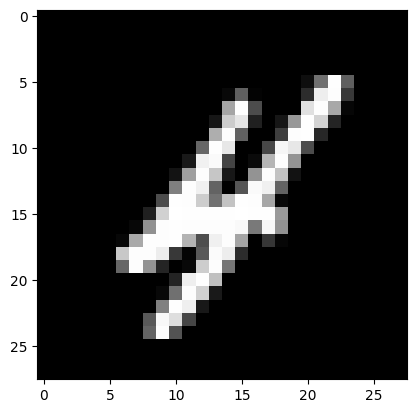

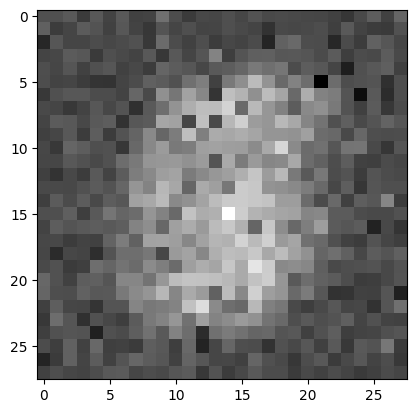

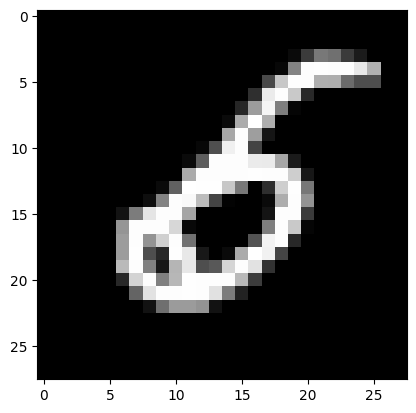

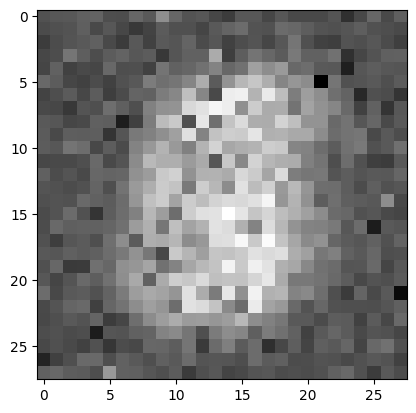

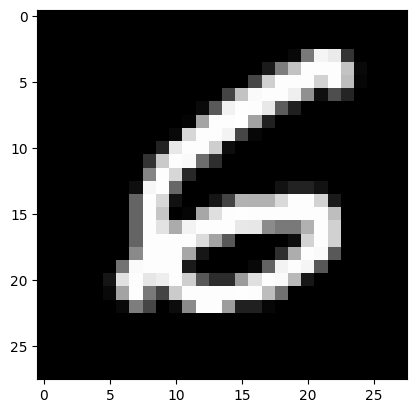

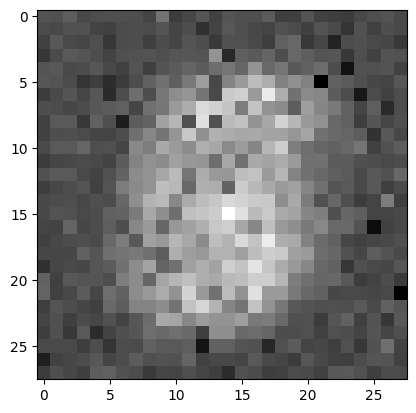

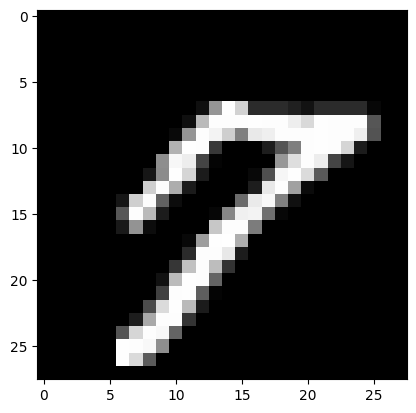

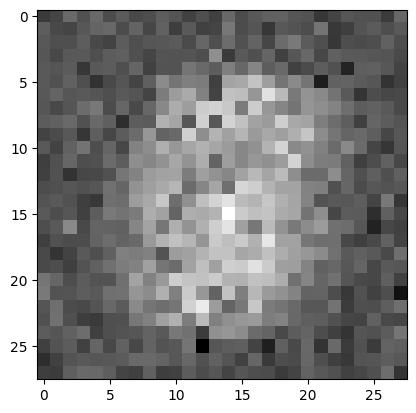

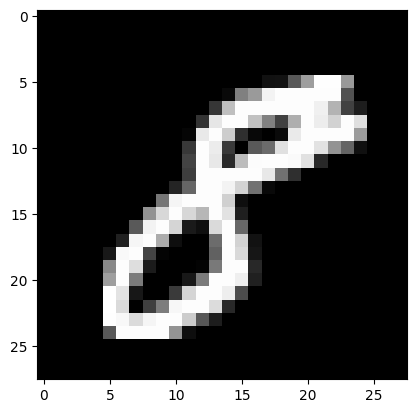

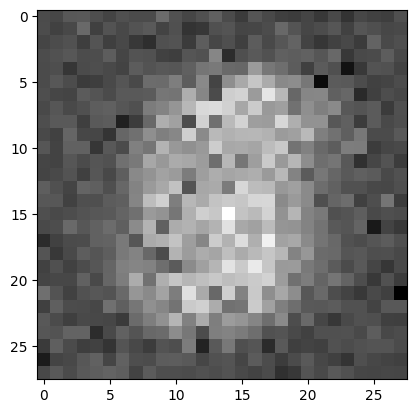

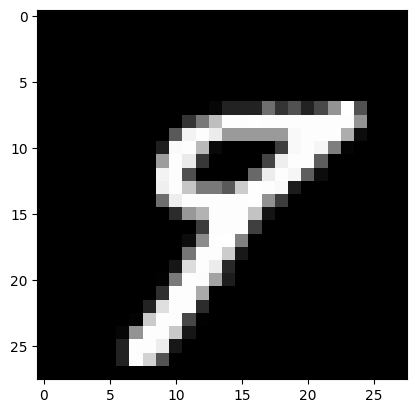

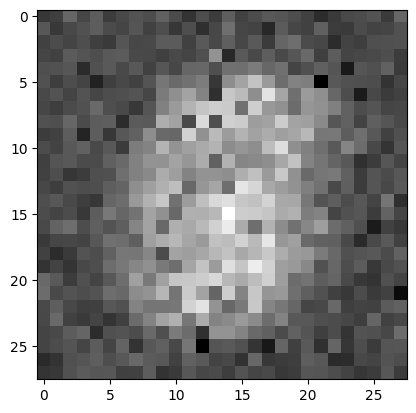

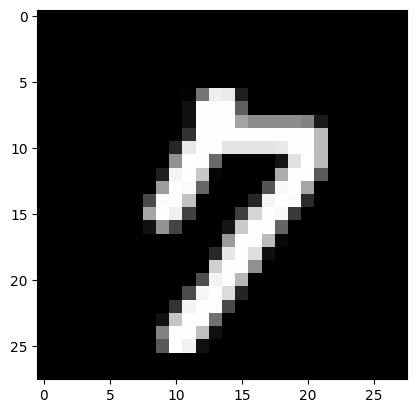

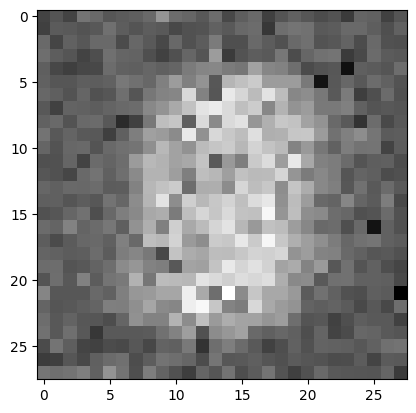

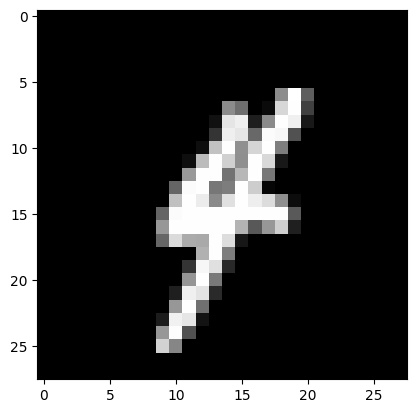

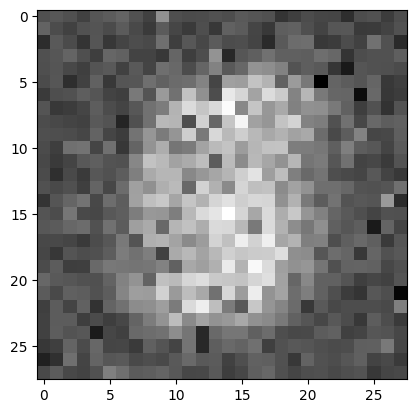

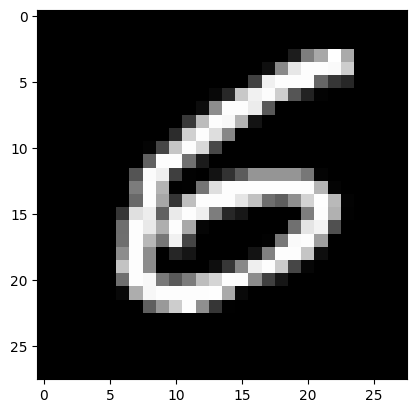

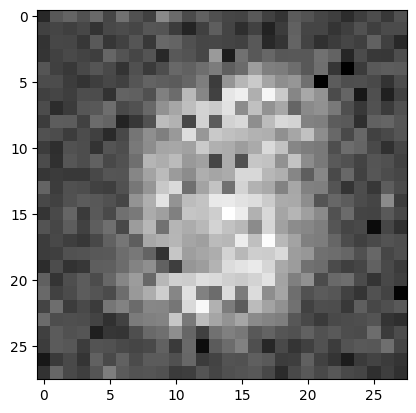

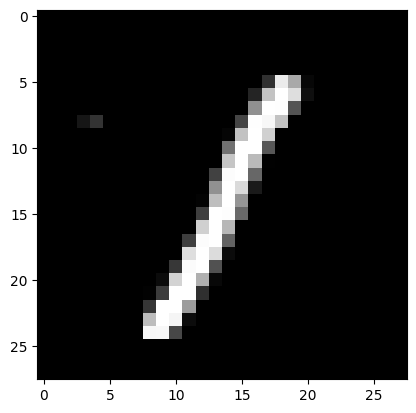

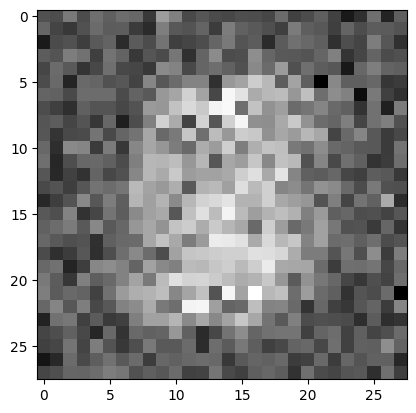

In [20]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
  plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()